# Import statements

In [1]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

# Functions

In [2]:
def AIMD(a:int=1, b:float=0.5, cwnd:int=10, data_packet:tuple=(None, "Dropped"), RTT_tracker:list=[])->list:
    """This function mimics the Additive Increase and Multiplicative Decrease Mechanism in TCP Congestion Control.

    Parameters
    ----------
    a: int-type
    This constant controls the rate of Additive Increase. This optimises the efficiency of the network.
    
    b: float-type
    This constant controls the rate of Multiplicative Decrease. This optimises the fairness of the network.
    This value is between 0 (exclusive) and alpha (exclusive).
    
    With these two parameters, the network system converges to optimal network conditions where the fairness line intersects with the 
    efficiency line.
    
    cwnd: int-type
    This denotes the current window size.
    
    data_packet: tuple-type
    This represents the data packet to be transferred through the network.
    
    RTT_tracker: list-type
    This tracks the RTT to cwnd size.
    
    Returns
    -------
    cwnd load
    """
    _, status = data_packet
    
    if status == 'Transfer':
        cwnd += a
    else:
        cwnd = math.floor(cwnd*(1-b))
        # cwnd = math.floor(cwnd * b)
        
    RTT_tracker.append(cwnd)
    
    return cwnd

def generate_data_packets(num_packets, drop_probability):
    """
    Generate a list of tuples representing data packets with randomly dropped packets.

    Parameters:
    - num_packets: The total number of data packets.
    - drop_probability: The probability of a packet being dropped (a float between 0 and 1).

    Returns:
    - A list of tuples representing data packets.
    """
    data_packets = [(x, "Transfer") if random.random() > drop_probability else (x, "Dropped") for x in range(1, num_packets + 1)]
    return data_packets

def generate_data_packets_consistent_drops(num_packets):
    return [(x, "Transfer") if x % 5 != 0 else (x, "Dropped") for x in range(1, num_packets+1)]

def simulate_tcp_congestion(ai, md, initial_cwnd, num__packets, drop_probability):
    # Set Up for Data
    data_packets = generate_data_packets(100,0.2)
    # Parameters
    cwnd = 10
    a = 1
    b = 0.5

    # Iterate
    RTT_tracker = []
    for data_packet in data_packets:
        cwnd = AIMD(a, b, cwnd, data_packet, RTT_tracker)

    # Visualise
    x, y = [], []
    for idx, cwnd in enumerate(RTT_tracker):
        print(f"RTT {idx + 1}:\t", cwnd)
        x.append(idx + 1)
        y.append(cwnd)

    # fig, ax = plt.subplots()
    # ax.plot(x, y)
    # ax.set_xlabel("RTT")
    # ax.set_ylabel("CWND")
    # ax.set_title(f"RTT vs CWND with a={a} and b={b}")

    # return fig, ax
    return x,y

# CWND vs RTT

RTT 1:	 11
RTT 2:	 12
RTT 3:	 13
RTT 4:	 6
RTT 5:	 3
RTT 6:	 4
RTT 7:	 5
RTT 8:	 6
RTT 9:	 7
RTT 10:	 8
RTT 11:	 9
RTT 12:	 10
RTT 13:	 11
RTT 14:	 12
RTT 15:	 6
RTT 16:	 7
RTT 17:	 3
RTT 18:	 4
RTT 19:	 5
RTT 20:	 2
RTT 21:	 3
RTT 22:	 4
RTT 23:	 5
RTT 24:	 6
RTT 25:	 7
RTT 26:	 8
RTT 27:	 4
RTT 28:	 5
RTT 29:	 6
RTT 30:	 7
RTT 31:	 8
RTT 32:	 9
RTT 33:	 10
RTT 34:	 11
RTT 35:	 12
RTT 36:	 13
RTT 37:	 14
RTT 38:	 15
RTT 39:	 16
RTT 40:	 8
RTT 41:	 9
RTT 42:	 4
RTT 43:	 5
RTT 44:	 6
RTT 45:	 3
RTT 46:	 4
RTT 47:	 5
RTT 48:	 2
RTT 49:	 3
RTT 50:	 4
RTT 51:	 2
RTT 52:	 3
RTT 53:	 4
RTT 54:	 5
RTT 55:	 6
RTT 56:	 7
RTT 57:	 8
RTT 58:	 9
RTT 59:	 10
RTT 60:	 11
RTT 61:	 12
RTT 62:	 6
RTT 63:	 7
RTT 64:	 8
RTT 65:	 9
RTT 66:	 10
RTT 67:	 11
RTT 68:	 12
RTT 69:	 13
RTT 70:	 6
RTT 71:	 7
RTT 72:	 8
RTT 73:	 9
RTT 74:	 4
RTT 75:	 5
RTT 76:	 6
RTT 77:	 3
RTT 78:	 4
RTT 79:	 5
RTT 80:	 6
RTT 81:	 7
RTT 82:	 8
RTT 83:	 4
RTT 84:	 5
RTT 85:	 6
RTT 86:	 7
RTT 87:	 8
RTT 88:	 9
RTT 89:	 10
RTT 90:	 

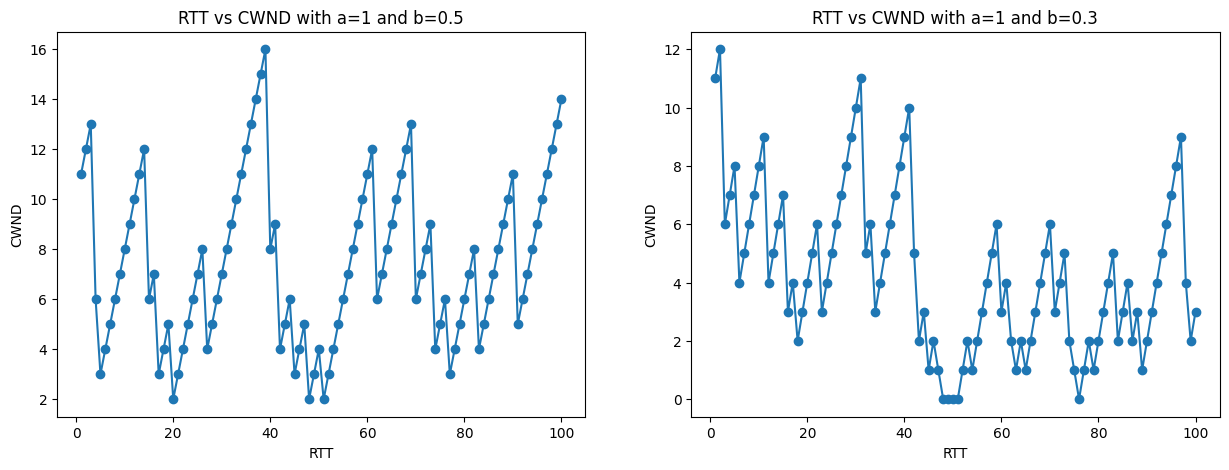

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

x1_md, y1 = simulate_tcp_congestion(ai=1, md=0.5, initial_cwnd=10, num__packets=50, drop_probability=0.2)
x2, y2 = simulate_tcp_congestion(ai=1, md=0.3, initial_cwnd=10, num__packets=50, drop_probability=0.2)

# Assign each subplot to a specific position
axs[0].plot(x1_md,y1,marker='o')
axs[0].set_xlabel("RTT")
axs[0].set_ylabel("CWND")
axs[0].set_title(f"RTT vs CWND with a={1} and b={0.5}")

axs[1].plot(x2,y2,marker='o')
axs[1].set_xlabel("RTT")
axs[1].set_ylabel("CWND")
axs[1].set_title(f"RTT vs CWND with a={1} and b={0.3}")

plt.show()

# X1 vs X2 user allocation

## Linear

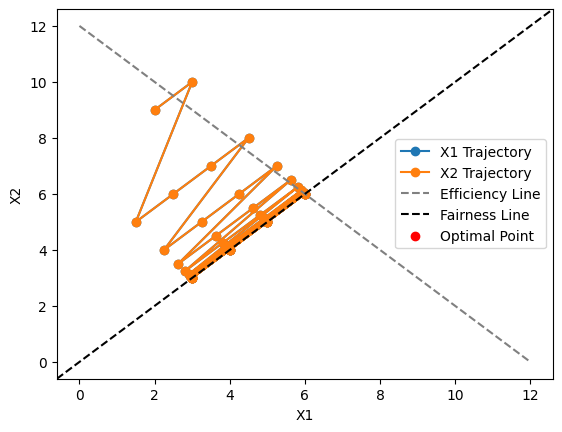

In [4]:
num_steps = 50
X_goal = 12
beta1 = 1/2
beta2 = 1/2
alpha1 = 1
alpha2 = 1

# Initialize arrays to store trajectory points
X1_values = [2]
X2_values = [9]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 <= X_goal:
        # Underloaded: Apply additive increase
        x1 = x1 + alpha1
        x2 = x2 + alpha2

    else:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 * beta1
        x2 = x2 * beta2

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='X1 Trajectory')
plt.plot(X1_values, X2_values, marker='o', label='X2 Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
# plt.plot(range(num_steps + 1), fairness_values, marker='o', label='Fairness')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,10])
# plt.ylim([0,10])
plt.legend()

# Show the plot
plt.show()

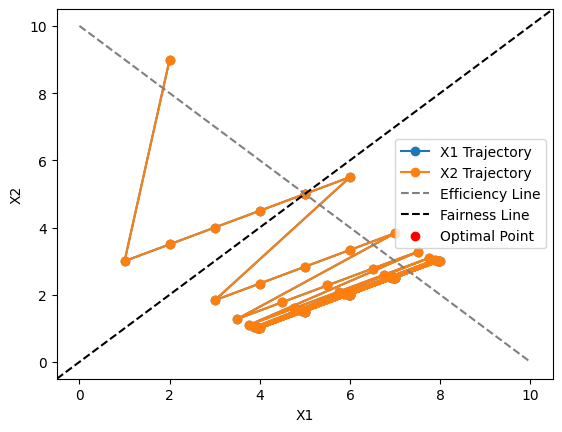

In [5]:
num_steps = 50
X_goal = 10
beta1 = 1/2
beta2 = 1/3
alpha1 = 1
alpha2 = 0.5

# Initialize arrays to store trajectory points
X1_values = [2]
X2_values = [9]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 <= X_goal:
        # Underloaded: Apply additive increase
        x1 = x1 + alpha1
        x2 = x2 + alpha2

    else:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 * beta1
        x2 = x2 * beta2

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='X1 Trajectory')
plt.plot(X1_values, X2_values, marker='o', label='X2 Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
# plt.plot(range(num_steps + 1), fairness_values, marker='o', label='Fairness')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# Show the plot
plt.show()

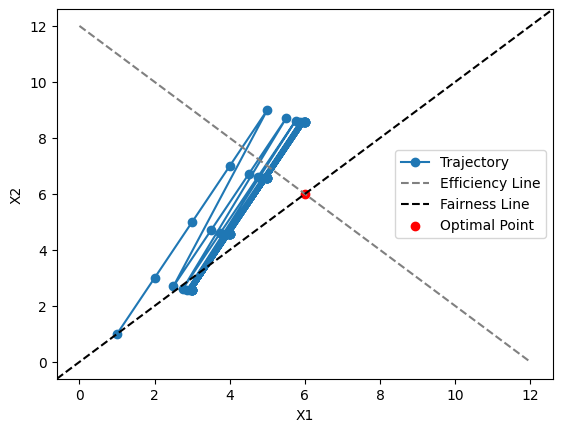

In [6]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 50
X_goal = 12
exponent1 = 0.5
exponent2 = 0.3
alpha1 = 1
alpha2 = 2

# Initialize arrays to store trajectory points
X1_values = [1]
X2_values = [1]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    # fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    # fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 <= X_goal:
        # Underloaded: Apply additive increase
        x1 = x1 + alpha1
        x2 = x2 + alpha2

    else:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 * exponent1
        x2 = x2 * exponent2

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,3])
# plt.ylim([0,3])
plt.legend()

# Show the plot
plt.show()

## Non linear additive increase

### log

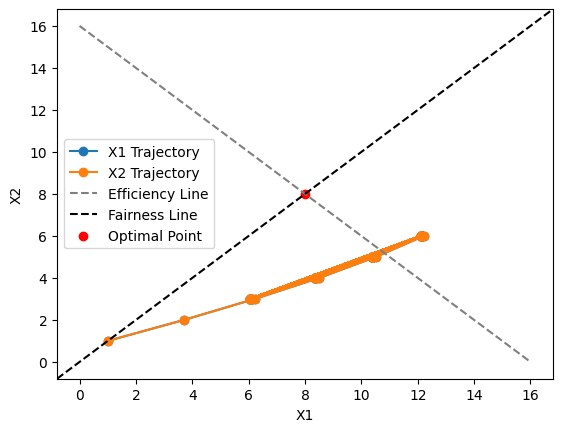

In [7]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 100
X_goal = 16
exponent1 = 1/2
exponent2 = 1/2
alpha1 = 0
alpha2 = 1

# Initialize arrays to store trajectory points
X1_values = [1]
X2_values = [1]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 <= X_goal:
        # Underloaded: Apply additive increase
        # if x1 <= 0:
        #     x1 = 1
        x1 = x1 + np.log(X_goal-x1)
        x2 = x2 + 1

    else:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 * exponent1
        x2 = x2 * exponent2

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='X1 Trajectory')
plt.plot(X1_values, X2_values, marker='o', label='X2 Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
# plt.plot(range(num_steps + 1), fairness_values, marker='o', label='Fairness')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,10])
# plt.ylim([0,10])
plt.legend()

# Show the plot
plt.show()


### Tutorial sample answer

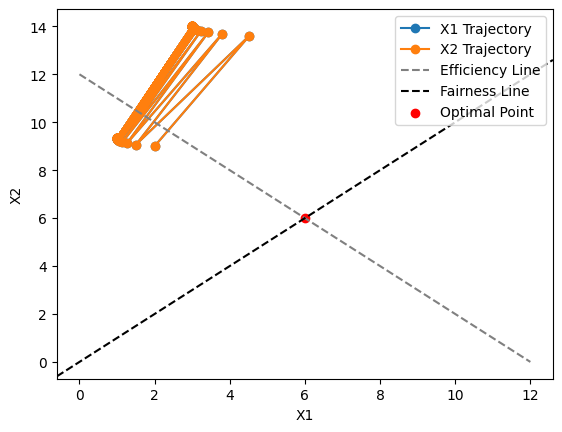

In [8]:
num_steps = 50
X_goal = 12
exponent1 = 1/3
exponent2 = 1-exponent1
alpha = 2
alpha1 = alpha
alpha2 = alpha


# Initialize arrays to store trajectory points
X1_values = [2]
X2_values = [9]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 <= X_goal:
        # Underloaded: Apply additive increase
        alpha1 = alpha * np.power(x1, exponent1)
        alpha2 = alpha * np.log(x2 + 1)

        x1 = x1 + alpha1
        x2 = x2 + alpha2

    # elif x1 + x2 > X_goal:
    else:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 * exponent1
        x2 = x2 * exponent2

    # x1 = math.ceil(x1)
    # x2 = math.ceil(x2)

    # print(f"x1:{x1}")
    # print(f"x2:{x2}")

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='X1 Trajectory')
plt.plot(X1_values, X2_values, marker='o', label='X2 Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
# plt.plot(range(num_steps + 1), fairness_values, marker='o', label='Fairness')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,10])
# plt.ylim([0,10])
plt.legend()

# Show the plot
plt.show()

### Own experiment #1

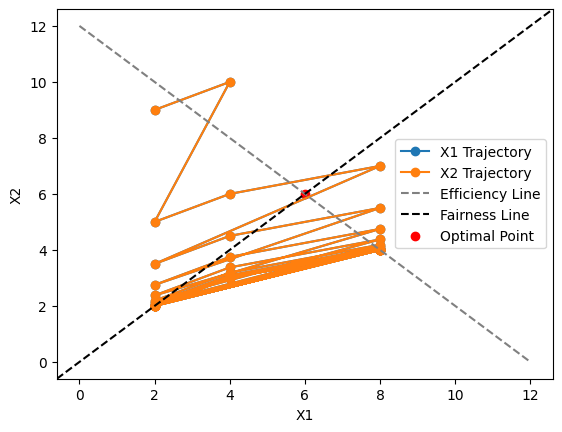

In [9]:
def custom_exp(w,a):
    return math.exp(w)

def custom_log(w,a):
    return math.log(w)

num_steps = 50
X_goal = 12

alpha1 = 1
alpha2 = 1
beta1 = 1/2
beta2 = 1/2

# Initialize arrays to store trajectory points
X1_values = [2]
X2_values = [9]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 <= X_goal:
        # Underloaded: Apply additive increase

        x1 = x1 + (x1*alpha1)
        x2 = x2 + alpha2

    # elif x1 + x2 > X_goal:
    else:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 / (x1*beta1)
        x2 = x2 * beta2

    # x1 = math.ceil(x1)
    # x2 = math.ceil(x2)

    # print(f"x1:{x1}")
    # print(f"x2:{x2}")

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='X1 Trajectory')
plt.plot(X1_values, X2_values, marker='o', label='X2 Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
# plt.plot(range(num_steps + 1), fairness_values, marker='o', label='Fairness')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,10])
# plt.ylim([0,10])
plt.legend()

# Show the plot
plt.show()

### Own experiment #2

x1:2.6931471805599454
x2:10
x1:0.18223891823948252
x2:5.0
x1:-1.5201977969729314
x2:6.0
x1:1.0
x2:7.0
x1:1.0
x2:8.0
x1:1.0
x2:9.0
x1:1.0
x2:10.0
x1:1.0
x2:11.0
x1:1.0
x2:12.0
x1:0.36787944117144233
x2:6.0
x1:-0.6321205588285577
x2:7.0
x1:1.0
x2:8.0
x1:1.0
x2:9.0
x1:1.0
x2:10.0
x1:1.0
x2:11.0
x1:1.0
x2:12.0
x1:0.36787944117144233
x2:6.0
x1:-0.6321205588285577
x2:7.0
x1:1.0
x2:8.0
x1:1.0
x2:9.0
x1:1.0
x2:10.0
x1:1.0
x2:11.0
x1:1.0
x2:12.0
x1:0.36787944117144233
x2:6.0
x1:-0.6321205588285577
x2:7.0
x1:1.0
x2:8.0
x1:1.0
x2:9.0
x1:1.0
x2:10.0
x1:1.0
x2:11.0
x1:1.0
x2:12.0
x1:0.36787944117144233
x2:6.0
x1:-0.6321205588285577
x2:7.0
x1:1.0
x2:8.0
x1:1.0
x2:9.0
x1:1.0
x2:10.0
x1:1.0
x2:11.0
x1:1.0
x2:12.0
x1:0.36787944117144233
x2:6.0
x1:-0.6321205588285577
x2:7.0
x1:1.0
x2:8.0
x1:1.0
x2:9.0
x1:1.0
x2:10.0
x1:1.0
x2:11.0
x1:1.0
x2:12.0
x1:0.36787944117144233
x2:6.0
x1:-0.6321205588285577
x2:7.0
x1:1.0
x2:8.0
x1:1.0
x2:9.0
x1:1.0
x2:10.0
x1:1.0
x2:11.0


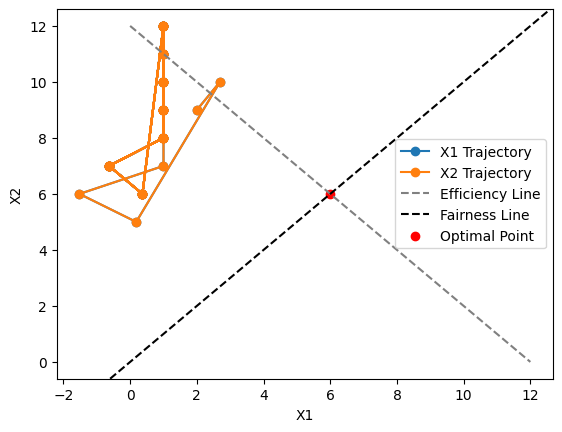

In [10]:
num_steps = 50
X_goal = 12

alpha1 = 1
alpha2 = 1
beta1 = 1/2
beta2 = 1/2

# Initialize arrays to store trajectory points
X1_values = [2]
X2_values = [9]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 <= X_goal:
        # Underloaded: Apply additive increase
        if x1 < 0:
            x1 = 1
        x1 = x1 + math.log(x1)
        x2 = x2 + alpha2

    # elif x1 + x2 > X_goal:
    else:
        # Overloaded: Apply multiplicative decrease
        x1 = x1 / math.exp(x1)
        x2 = x2 * beta2

    print(f"x1:{x1}")
    print(f"x2:{x2}")

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='X1 Trajectory')
plt.plot(X1_values, X2_values, marker='o', label='X2 Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
# plt.plot(range(num_steps + 1), fairness_values, marker='o', label='Fairness')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,10])
# plt.ylim([0,10])
plt.legend()

# Show the plot
plt.show()

### Own experiment #3

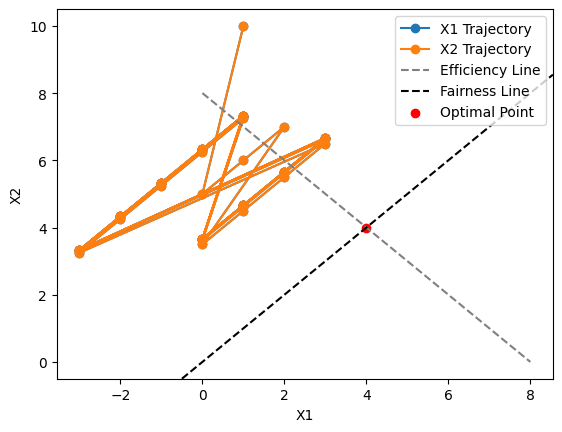

In [11]:
num_steps = 50
X_goal = 8

alpha1 = 1
alpha2 = 1
beta1 = 1/2
beta2 = 1/2

# Initialize arrays to store trajectory points
X1_values = [1]
X2_values = [10]
fairness_values = [0]

for _ in range(num_steps):
    # Calculate fairness at the current point
    fairness_value = ((X1_values[-1] + X2_values[-1])**2) / (2 * (X1_values[-1]**2 + X2_values[-1]**2))
    fairness_values.append(fairness_value)

    # Check whether the system is underloaded, overloaded, or efficient
    x1 = X1_values[-1]
    x2 = X2_values[-1]
    
    if x1 + x2 <= X_goal:
        # Underloaded: Apply additive increase

        x1 = x1 + alpha1
        x2 = x2 + alpha2

    # elif x1 + x2 > X_goal:
    else:
        # Overloaded: Apply multiplicative decrease
        x1 = math.floor(1 - (x1*beta1)) * x1
        x2 = x2 * beta2

    # x1 = math.ceil(x1)
    # x2 = math.ceil(x2)

    # print(f"x1:{x1}")
    # print(f"x2:{x2}")

    X1_values.append(x1)
    X2_values.append(x2)

# Plot the trajectory
plt.plot(X1_values, X2_values, marker='o', label='X1 Trajectory')
plt.plot(X1_values, X2_values, marker='o', label='X2 Trajectory')
plt.plot(np.arange(0, X_goal+1), X_goal - np.arange(0, X_goal+1), linestyle='--', color='gray', label='Efficiency Line')
# plt.plot(range(num_steps + 1), fairness_values, marker='o', label='Fairness')
plt.axline((0, 0), slope=1, linestyle='--', color='black', label='Fairness Line')

# Mark the optimal point
plt.scatter([X_goal / 2], [X_goal / 2], color='red', label='Optimal Point')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
# plt.xlim([0,10])
# plt.ylim([0,10])
plt.legend()

# Show the plot
plt.show()

# Machine learning

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## IDK what to do with this

In [13]:
import numpy as np

def simulate_congestion(a, b, max_rounds=100, initial_cwnd=1):
    # Initialize variables
    cwnd = initial_cwnd
    time_series = []
    
    for _ in range(max_rounds):
        # Simulate packet transmission and acknowledgment
        successful_transmission = np.random.choice([True, False], p=[cwnd / (cwnd + b), b / (cwnd + b)])
        
        if successful_transmission:
            # Increase congestion window (Additive Increase)
            cwnd += a
        else:
            # Decrease congestion window (Multiplicative Decrease)
            cwnd = max(1, int(cwnd * (1 - b)))

        # Store the congestion window size in the time series
        time_series.append(cwnd)
    
    # Return the time series as relevant features
    return np.array(time_series)

# Example usage:
a_parameter = 0.1
b_parameter = 0.2
time_series_features = simulate_congestion(a_parameter, b_parameter)

# Print the resulting time series
print("Congestion Window Size Time Series:")
print(time_series_features)

import numpy as np

np.random.seed(42)  # Set a seed for reproducibility
a_values = np.random.uniform(low=0.1, high=1.0, size=100)
b_values = np.random.uniform(low=0.1, high=1.0, size=100)

training_data = []

for a, b in zip(a_values, b_values):
    features = simulate_congestion(a, b)
    training_data.append((features, a, b))


Congestion Window Size Time Series:
[1.  1.1 1.2 1.3 1.4 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8
 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7
 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5
 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3
 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.array([data[0] for data in training_data])
y_a = np.array([data[1] for data in training_data])
y_b = np.array([data[2] for data in training_data])

# Split the data into training and testing sets
X_train, X_test, y_a_train, y_a_test, y_b_train, y_b_test = train_test_split(X, y_a, y_b, test_size=0.2, random_state=42)

# Train the model for parameter 'a'
model_a = LinearRegression()
model_a.fit(X_train, y_a_train)

# Train the model for parameter 'b'
model_b = LinearRegression()
model_b.fit(X_train, y_b_train)

# Make predictions on the test set
predictions_a = model_a.predict(X_test)
predictions_b = model_b.predict(X_test)

# Evaluate the model
mse_a = mean_squared_error(y_a_test, predictions_a)
mse_b = mean_squared_error(y_b_test, predictions_b)

print(f'Mean Squared Error for a: {mse_a}')
print(f'Mean Squared Error for b: {mse_b}')

Mean Squared Error for a: 1.1826429490284487
Mean Squared Error for b: 10.475038853005485


## Dynamic AIMD algorithm for Single user in a network

In [15]:
import random
import math
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def AIMD_with_parameters(a, b, cwnd, data_packet, RTT_tracker):
    _, status = data_packet
    
    if status == 'Transfer':
        cwnd += a
    else:
        cwnd = math.floor(cwnd * b)
        
    RTT_tracker.append(cwnd)
    
    return cwnd

def generate_data_for_ml(num_packets, drop_probability, a_range, b_range):
    data_packets = [(x, "Transfer") if random.random() > drop_probability else (x, "Dropped") for x in range(1, num_packets + 1)]

    throughput_values = []
    queuing_delay_values = []
    a_values = []
    b_values = []

    for a in a_range:
        for b in b_range:
            cwnd = 10
            RTT_tracker = []
            queue = []

            for data_packet in data_packets:
                cwnd = AIMD_with_parameters(a, b, cwnd, data_packet, RTT_tracker)

                if data_packet[1] == "Transfer":
                    # Packet is in transit, add to the queue
                    queue.append(cwnd)

                # Update queuing delay for each packet in the queue
                queuing_delay_values.extend([max(0, time - i) for i, time in enumerate(queue)])
                queue = [time for time in queue if time > 0]  # Remove packets that have been sent

                throughput_values.append(cwnd)  # Assuming CWND represents throughput
                a_values.append(a)
                b_values.append(b)

    return throughput_values, queuing_delay_values, a_values, b_values

# Example: Generate data for ML
num_packets = 100
drop_probability = 0.2
a_range = [0.5, 1, 1.5, 2, 2.5, 3]  # Adjust the range based on your expectations
b_range = [0.2, 0.5, 0.8, 0.9, 0.95, 0.97]  # Adjust the range based on your expectations

throughput_values, queuing_delay_values, a_values, b_values = generate_data_for_ml(num_packets, drop_probability, a_range, b_range)

# Split data into training and testing sets
X = list(zip(throughput_values, queuing_delay_values))
y = list(zip(a_values, b_values))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Use the model to make predictions on new data
new_data = [(100, 5)]  # Example new data
new_predictions = model.predict(new_data)
print(f"Predicted Parameters for New Data: {new_predictions}")

Mean Absolute Error: 0.3766209382249248
Predicted Parameters for New Data: [[1.6121844 0.9685192]]


## Dynamic AIMD algorithm for multiple user in a network

### Attempt #0

In [16]:
import simpy
import pandas as pd
import math
import random

class User:
    def __init__(self, env, user_id, a, b):
        self.env = env
        self.user_id = user_id
        self.a = a
        self.b = b
        self.cwnd = 1
        self.RTT_tracker = []
        self.data_packet = None
        self.active = True
        self.throughput = 0

    def AIMD_with_parameters(self):
        _, status = self.data_packet

        if status == 'Transfer':
            self.cwnd += self.a
        else:
            self.cwnd = math.floor(self.cwnd * self.b)

        self.RTT_tracker.append(self.cwnd)

    def network_simulation(self, simulation_time):
        while self.env.now < simulation_time:
            yield self.env.timeout(1)  # Simulate 1 time unit
            self.data_packet = ('SomeData', random.choice(['Transfer', 'Ack']))
            self.AIMD_with_parameters()

    def monitor(self):
        while True:
            if not self.active:
                return
            self.throughput += len(self.RTT_tracker)
            yield self.env.timeout(1)

def simulation(env, num_users, simulation_time, output_file):
    users = []
    for i in range(num_users):
        a = random.uniform(0.05, 1)
        b = random.uniform(0.5, 0.99)
        user = User(env, i, a, b)
        env.process(user.network_simulation(simulation_time))
        env.process(user.monitor())
        users.append(user)

    # Additional metrics
    network_congestion_level = sum(user.cwnd for user in users)
    throughput = sum(user.throughput for user in users)
    packet_loss_rate = 1 - (sum(len(user.RTT_tracker) for user in users) / (num_users * simulation_time))
    num_active_users = sum(user.active for user in users)
    # Check if there are RTT measurements before calculating overall_RTT
    if any(user.RTT_tracker for user in users):
        overall_RTT = sum(sum(user.RTT_tracker) for user in users) / sum(len(user.RTT_tracker) for user in users)
    else:
        overall_RTT = 0  # Set to 0 if no RTT measurements are available

    # Save the simulation results to a CSV file
    df = pd.DataFrame({
        'Time': range(simulation_time),
        'Network Congestion Level': [network_congestion_level] * simulation_time,
        'Individual User Throughput': [throughput] * simulation_time,
        'Packet Loss Rate': [packet_loss_rate] * simulation_time,
        'Number of Active Users': [num_active_users] * simulation_time,
        'Overall RTT': [overall_RTT] * simulation_time,
        'a': [user.a for user in users],
        'b': [user.a for user in users], 
    })
    display(df)  # Display DataFrame in Jupyter to check the results
    df.to_csv(output_file, index=False)

simulation_time = 100  # Adjust the simulation time as needed
num_users = 5  # Adjust the number of users as needed
output_file = 'simulation_data.csv'

env = simpy.Environment()
env.process(simulation(env, num_users, simulation_time, output_file))
env.run(until=simpy.events.AnyOf(env, [env.timeout(simulation_time)]))


ValueError: All arrays must be of the same length

### Attempt #1

In [ ]:
import simpy
import pandas as pd
import math
import random

class User:
    def __init__(self, env, user_id, a, b):
        self.env = env
        self.user_id = user_id
        self.a = a
        self.b = b
        self.cwnd = 1
        self.RTT_tracker = []
        self.data_packet = None
        self.active = True
        self.throughput = 0
        self.packet_loss_rate = 0

    def AIMD_with_parameters(self):
        _, status = self.data_packet

        if status == 'Transfer':
            self.cwnd += self.a
        else:
            self.cwnd = math.floor(self.cwnd * self.b)

        self.RTT_tracker.append(self.cwnd)

    def network_simulation(self, simulation_time):
        while self.env.now < simulation_time:
            yield self.env.timeout(1)  # Simulate 1 time unit
            self.data_packet = ('SomeData', random.choice(['Transfer', 'Ack']))
            self.AIMD_with_parameters()

    def monitor(self):
        while True:
            if not self.active:
                return
            self.throughput += len(self.RTT_tracker)
            if self.env.now > 0:
                self.packet_loss_rate = 1 - (len(self.RTT_tracker) / self.env.now)
            else:
                self.packet_loss_rate = 0
            yield self.env.timeout(1)

def simulation(env, num_users, simulation_time, output_file):
    users = []
    user_data = []  # List to store individual user data

    for i in range(num_users):
        a = random.uniform(0.05, 1)
        b = random.uniform(0.5, 0.99)
        user = User(env, i, a, b)
        env.process(user.network_simulation(simulation_time))
        env.process(user.monitor())
        users.append(user)

    # Run simulation
    env.run(until=simulation_time)

    # Collect individual user data
    for user in users:
        user_data.append({
            'User ID': user.user_id,
            'Throughput': user.throughput,
            'Packet Loss Rate': user.packet_loss_rate,
            'Overall RTT': sum(user.RTT_tracker) / len(user.RTT_tracker),
            'a': user.a,
            'b': user.b,
        })

    # Save individual user data to a CSV file
    df = pd.DataFrame(user_data)
    display(df)  # Display DataFrame in Jupyter to check the results
    df.to_csv(output_file, index=False)

simulation_time = 1000  # Adjust the simulation time as needed
num_users = 5  # Adjust the number of users as needed
output_file = 'individual_user_data.csv'

env = simpy.Environment()
simulation(env, num_users, simulation_time, output_file)

C:\Users\John\AppData\Local\Temp\ipykernel_18572\3639267464.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,User ID,Throughput,Packet Loss Rate,Overall RTT,a,b
0,0,499500,0.0,3.191182,0.825764,0.904814
1,1,499500,0.0,3.222377,0.691212,0.950147
2,2,499500,0.0,1.340932,0.823052,0.623900
3,3,499500,0.0,1.045785,0.709389,0.590636
4,4,499500,0.0,0.208836,0.214418,0.711890


### Attempt #2

In [ ]:
import random
import math
import csv
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def AIMD_with_parameters(a, b, cwnd, data_packet, RTT_tracker):
    _, status = data_packet
    
    if status == 'Transfer':
        cwnd += a
    else:
        cwnd = cwnd*(b)
        
    RTT_tracker.append(cwnd)
    
    return cwnd

def generate_data_for_ml(num_packets, num_users, drop_probability, a_range, b_range, output_file):
    data_packets = [
        [(x, "Transfer") if random.random() > drop_probability else (x, "Dropped") for x in range(1, num_packets + 1)]
        for _ in range(num_users)
    ]
    
    user_a_values = [random.choice(a_range) for _ in range(num_users)]
    user_b_values = [random.choice(b_range) for _ in range(num_users)]

    throughput_values = []
    queuing_delay_values = []
    a_values = []
    b_values = []

    for user_idx in range(num_users):
        cwnd = 10
        RTT_tracker = []
        queue = []

        for data_packet in data_packets[user_idx]:
            cwnd = AIMD_with_parameters(user_a_values[user_idx], user_b_values[user_idx], cwnd, data_packet, RTT_tracker)

            if data_packet[1] == "Transfer":
                # Packet is in transit, add to the queue
                queue.append(cwnd)

            # Update queuing delay for each packet in the queue
            queuing_delay_values.extend([max(0, time - i) for i, time in enumerate(queue)])
            queue = [time for time in queue if time > 0]  # Remove packets that have been sent

            throughput_values.append(cwnd)  # Assuming CWND represents throughput
            a_values.append(user_a_values[user_idx])
            b_values.append(user_b_values[user_idx])

    # Write data to CSV file
    with open(output_file, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Throughput', 'Queuing_Delay', 'Parameter_A', 'Parameter_B'])
        csv_writer.writerows(zip(throughput_values, queuing_delay_values, a_values, b_values))

# Example: Generate data for ML and write to CSV
num_packets = 100
num_users = 5  # Adjust the number of users as needed
drop_probability = 0.2
a_range = [0.5, 1, 1.5, 2, 2.5, 3]  # Adjust the range based on your expectations
b_range = [0.2, 0.5, 0.8, 0.9, 0.95, 0.97]  # Adjust the range based on your expectations

output_file = 'generated_data_multi_user.csv'

generate_data_for_ml(num_packets, num_users, drop_probability, a_range, b_range, output_file)

# Split data into training and testing sets
data = []
with open(output_file, 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    header = next(csv_reader)  # Skip the header
    for row in csv_reader:
        data.append(list(map(float, row)))

X = [row[:2] for row in data]
y = [row[2:] for row in data]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Use the model to make predictions on new data (multi-user)
new_data_multi_user = [(100, 5)] * num_users  # Example new data for multiple users
new_predictions_multi_user = model.predict(new_data_multi_user)
print(f"Predicted Parameters for AIMD (Multi-User): {new_predictions_multi_user}")


Mean Absolute Error: 0.20369789496064186
Predicted Parameters for AIMD (Multi-User): [[2.5532126 0.8301893]
 [2.5532126 0.8301893]
 [2.5532126 0.8301893]
 [2.5532126 0.8301893]
 [2.5532126 0.8301893]]


### Attempt #3

In [ ]:
import simpy
import csv
import numpy as np

class User:
    def __init__(self, env, name, shared_link, a, b):
        self.env = env
        self.name = name
        self.shared_link = shared_link
        self.a = a
        self.b = b

        self.throughput = 0
        self.packet_loss = 0
        self.latency = 0

        self.action = env.process(self.run())

    def run(self):
        while True:
            # Simulate AIMD algorithm
            yield self.env.timeout(1)  # Adjust timeout as needed
            self.throughput += self.a

            # Simulate network conditions
            self.packet_loss = np.random.uniform(0, 0.1)
            self.latency = np.random.uniform(10, 50)  # RTT in milliseconds

            # Update shared link
            with self.shared_link.request() as req:
                yield req
                # Here you can update the shared link, e.g., send packets, etc.
                pass

# Simulation parameters
num_users = 5
simulation_time = 100

# Data storage
data = []

# SimPy simulation environment
env = simpy.Environment()

# Shared link (network link)
shared_link = simpy.Resource(env, capacity=1)

# Create users with random AIMD parameters
users = []
for i in range(num_users):
    a = np.random.uniform(1, 5)
    b = np.random.uniform(0.1, 1)
    user = User(env, f'User_{i}', shared_link, a, b)
    users.append(user)

# Run simulation
env.run(until=simulation_time)

# Collect data
for user in users:
    data.append({
        'User': user.name,
        'Throughput': user.throughput,
        'PacketLoss': user.packet_loss,
        'Latency': user.latency,
        'A': user.a,
        'B': user.b
    })

# Write data to CSV file
csv_file_path = 'simulation_data.csv'
fieldnames = ['User', 'Throughput', 'PacketLoss', 'Latency', 'A', 'B']

with open(csv_file_path, 'w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)

print(f"Simulation data has been saved to {csv_file_path}")


Simulation data has been saved to simulation_data.csv


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Calculate sums for Throughput, PacketLoss, and Latency
sum_throughput = df['Throughput'].sum()
sum_packet_loss = df['PacketLoss'].sum()
sum_latency = df['Latency'].sum()

# Create a new DataFrame for the final format
final_data = {
    'Throughput': [sum_throughput],
    'PacketLoss': [sum_packet_loss],
    'Latency': [sum_latency],
}

# Iterate through each user and append values to the final_data dictionary
for i, row in df.iterrows():
    user_label = f'user{i}'
    final_data[f'{user_label}A'] = [row['A']]
    final_data[f'{user_label}B'] = [row['B']]

# Create the final DataFrame
final_df = pd.DataFrame(final_data)

# Save the final DataFrame to a new CSV file
final_df.to_csv('output.csv', index=False)


### Current attempt

In [14]:
import simpy
import csv
import numpy as np
import pandas as pd

class User:
    def __init__(self, env, name, shared_link, initial_cwnd, max_cwnd, min_cwnd, a, b):
        self.env = env
        self.name = name
        self.shared_link = shared_link
        self.a = a
        self.b = b
        self.cwnd = initial_cwnd
        self.max_cwnd = max_cwnd
        self.min_cwnd = min_cwnd
        self.throughput = 0
        self.packet_loss = 0
        self.latency = 0

        self.action = env.process(self.run())

    def run(self):
        while True:
            # Simulate AIMD algorithm
            yield self.env.timeout(1)  # Adjust timeout as needed
            self.throughput += self.a

            # Simulate network conditions
            self.packet_loss = np.random.uniform(0, 0.1)
            self.latency = np.random.uniform(10, 50)  # RTT in milliseconds
            
            # Multiplicative Decrease
            if self.packet_loss > 0.05:  # Adjust the threshold as needed
                self.throughput *= self.b  # Multiplicative decrease factor, can be adjusted

            self.cwnd = max(self.min_cwnd, min(self.cwnd, self.max_cwnd))

            # Update shared link
            with self.shared_link.request() as req:
                yield req
                # Here you can update the shared link, e.g., send packets, etc.
                pass

def run_simulation_and_save_csv(num_users, simulation_time, csv_file_path):
    # SimPy simulation environment
    env = simpy.Environment()

    # Shared link (network link)
    shared_link = simpy.Resource(env, capacity=1)

    # Create users with random AIMD parameters
    users = []
    for i in range(num_users):
        a = np.random.uniform(1, 5)
        b = np.random.uniform(0.1, 1)
        user = User(env, f'User_{i}', shared_link, 1, 16, 1, a, b)
        users.append(user)

    # Run simulation
    env.run(until=simulation_time)

    # Collect data
    data = []
    for user in users:
        data.append({
            'User': user.name,
            'Throughput': user.throughput,
            'PacketLoss': user.packet_loss,
            'Latency': user.latency,
            'A': user.a,
            'B': user.b
        })

    # Write data to CSV file
    fieldnames = ['User', 'Throughput', 'PacketLoss', 'Latency', 'A', 'B']

    try:
        # Check if the file exists
        with open(csv_file_path, 'r', newline='') as existing_file:
            existing_data = list(csv.DictReader(existing_file))
            if existing_data:
                # Append the new data to the existing file
                data = existing_data + data
    except FileNotFoundError:
        # If the file doesn't exist, create a new one with the header
        with open(csv_file_path, 'w', newline='') as new_file:
            writer = csv.DictWriter(new_file, fieldnames=fieldnames)
            writer.writeheader()

    # Append the data to the file
    with open(csv_file_path, 'a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writerows(data)
    
    print(f"Simulation data has been saved to {csv_file_path}")


def convert_csv_to_output_format(input_csv_path, output_csv_path, users_per_entry=5):
    # Read the CSV file
    df = pd.read_csv(input_csv_path)

    # Calculate sums for Throughput, PacketLoss, and Latency for every 'users_per_entry' users
    num_entries = len(df) // users_per_entry
    final_data = {'Throughput': [], 'PacketLoss': [], 'Latency': []}

    for entry in range(num_entries):
        start_idx = entry * users_per_entry
        end_idx = (entry + 1) * users_per_entry
        final_data['Throughput'].append(df['Throughput'].iloc[start_idx:end_idx].sum())
        final_data['PacketLoss'].append(df['PacketLoss'].iloc[start_idx:end_idx].sum())
        final_data['Latency'].append(df['Latency'].iloc[start_idx:end_idx].sum())

        for user_num in range(users_per_entry):
            user_label = f'user{entry * users_per_entry + user_num}'
            final_data[f'{user_label}A'] = df['A'].iloc[start_idx + user_num]
            final_data[f'{user_label}B'] = df['B'].iloc[start_idx + user_num]

    # Create the final DataFrame
    final_df = pd.DataFrame(final_data)

    # Reorganize the columns to match the desired order
    column_order = ['Throughput', 'PacketLoss', 'Latency']
    user_columns = [f'user{i}A' for i in range(users_per_entry)] + [f'user{i}B' for i in range(users_per_entry)]
    column_order.extend(user_columns)
    final_df = final_df[column_order]

    # Save the final DataFrame to a new CSV file
    final_df.to_csv(output_csv_path, index=False)
# Example usage
num_sets_of_data = 5
num_users = 2
csv_file_path = 'simulation_data_combined.csv'

for i in range(num_sets_of_data):
    run_simulation_and_save_csv(num_users=num_users, simulation_time=100, csv_file_path=csv_file_path)

# Convert the combined CSV to the desired output format
convert_csv_to_output_format(input_csv_path=csv_file_path, output_csv_path='output_combined.csv', users_per_entry=num_users)


Simulation data has been saved to simulation_data_combined.csv
Simulation data has been saved to simulation_data_combined.csv
Simulation data has been saved to simulation_data_combined.csv
Simulation data has been saved to simulation_data_combined.csv
Simulation data has been saved to simulation_data_combined.csv


In [26]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('output_combined.csv')

# Apply the transformations
df['PacketLoss'] = 1 / df['PacketLoss']
df['Latency'] = 1 / df['Latency']

df = df.rename(columns={"PacketLoss": "1/PacketLoss", "Latency": "1/Latency"})

# Save the modified DataFrame to a new CSV file
df.to_csv('output_combined_modified.csv', index=False)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

df = pd.read_csv("output_combined_modified.csv")
features = ["Throughput", "1/PacketLoss", "1/Latency"]
X = df[features]
y = df.drop(columns=features)

random_sample = X.sample(n=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Use the model to make predictions on new data (multi-user)
new_predictions_multi_user = model.predict(random_sample)
print(f"Predicted Parameters for AIMD (Multi-User): {new_predictions_multi_user}")

Mean Absolute Error: 1.1102230246251565e-16
Predicted Parameters for AIMD (Multi-User): [[2.69470203 3.97226483 0.18960084 0.14609301]]


# ETC

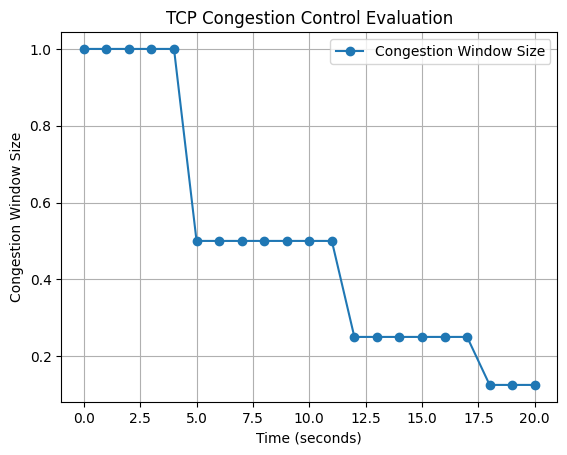

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_congestion_control(total_time, additive_increase_interval, multiplicative_decrease_events):
    # Simulated time and congestion window data
    time = np.arange(0, total_time + 1, 1)  # Time in seconds
    congestion_window = [1] * len(time)  # Initial congestion window size

    # Simulate congestion events
    for event_time in multiplicative_decrease_events:
        congestion_window[event_time:] = np.multiply(congestion_window[event_time:], 0.5)  # Multiplicative decrease

    # Simulate recovery and growth periods
    recovery_time = max(multiplicative_decrease_events) + additive_increase_interval
    congestion_window[recovery_time:] = np.add(congestion_window[recovery_time:], 1)  # Additive increase

    # Plotting the Congestion Window Size over Time
    plt.plot(time, congestion_window, label='Congestion Window Size', marker='o')
    plt.title('TCP Congestion Control Evaluation')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Congestion Window Size')
    plt.legend()
    plt.grid(True)
    plt.show()

simulate_congestion_control(total_time=20, additive_increase_interval=5, multiplicative_decrease_events=[5, 12, 18])

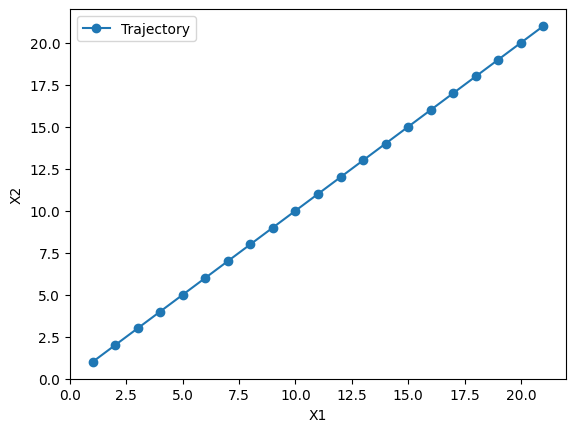

In [ ]:
# Set Up for Data
data_packets = generate_data_packets(20, 0.2)

# Parameters
cwnd = 1
a = 1
b = 0.5

# Initialize arrays to store trajectory points
X1_values = [cwnd]
X2_values = [cwnd]

# Iterate through data packets
for data_packet in data_packets:
    cwnd = AIMD(a, b, cwnd, data_packet)

    # Check packet status and adjust congestion control accordingly
    _, status = data_packet
    if status == "Dropped":
        cwnd = max(1, math.floor(cwnd * b))  # Example: Multiplicative decrease for dropped packets

    # Update trajectory
    X1_values.append(X1_values[-1] + a)
    X2_values.append(X2_values[-1] + a)

# Visualize
plt.plot(X1_values, X2_values, marker='o', label='Trajectory')

# Add labels and legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

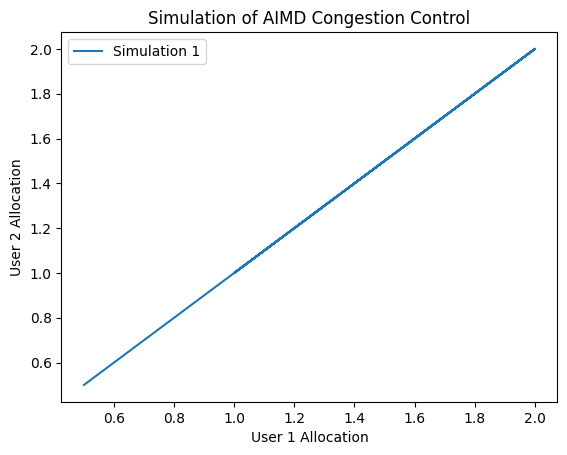

In [ ]:
import matplotlib.pyplot as plt

def AIMD(a, b, cwnd, data_packet, RTT_tracker, user_allocations):
    _, status = data_packet
    
    if status == 'Transfer':
        cwnd += a
    else:
        cwnd = math.floor(cwnd * b)
        
    RTT_tracker.append(cwnd)
    
    # Track user allocations
    user1_allocation = cwnd / 2
    user2_allocation = cwnd / 2
    user_allocations[0].append(user1_allocation)
    user_allocations[1].append(user2_allocation)

    return cwnd

def simulate_tcp_congestion(a, b, initial_cwnd_user1, initial_cwnd_user2, num_packets, drop_probability):
    # Set Up for Data
    data_packets = generate_data_packets(num_packets, drop_probability)
    # Parameters
    cwnd_user1 = initial_cwnd_user1
    cwnd_user2 = initial_cwnd_user2

    # Track user allocations
    user_allocations = [[], []]

    # Iterate
    RTT_tracker = []
    for data_packet in data_packets:
        cwnd_user1 = AIMD(a, b, cwnd_user1, data_packet, RTT_tracker, user_allocations)
        cwnd_user2 = AIMD(a, b, cwnd_user2, data_packet, RTT_tracker, user_allocations)

    # Visualize
    x, y = [], []
    for idx, cwnd in enumerate(RTT_tracker):
        x.append(idx + 1)
        y.append(cwnd)

    return x, y, user_allocations

def evaluate_convergence(num_simulations, num_packets, drop_probability, initial_cwnd_user1, initial_cwnd_user2):
    convergence_data = []

    for _ in range(num_simulations):
        x_data, y_data, user_allocations = simulate_tcp_congestion(1, 0.5, initial_cwnd_user1, initial_cwnd_user2, num_packets, drop_probability)
        convergence_data.append((x_data, y_data, user_allocations))

    # Visualize convergence for each simulation
    for idx, (x_data, y_data, user_allocations) in enumerate(convergence_data):
        plt.plot(user_allocations[0], user_allocations[1], label=f'Simulation {idx + 1}')

    # Add labels and legend
    plt.xlabel('User 1 Allocation')
    plt.ylabel('User 2 Allocation')
    plt.title(f'Simulation of AIMD Congestion Control')
    plt.legend()
    plt.show()

# Example usage with different initial values for user allocations
evaluate_convergence(num_simulations=1, num_packets=10, drop_probability=0.2, initial_cwnd_user1=2, initial_cwnd_user2=3)